<a href="https://colab.research.google.com/github/andriantri09/Belajar/blob/master/WORD2VEC_sentiment_analysis_KLASIFIKASI__lstm_FIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INPUT DATASET**

**Import Library**

In [96]:
#import library
import pandas as pd
import numpy as np
import re
import string

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import Adam
import gensim 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [64]:
import numpy as np
import json
import pandas as pd
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import csv
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [65]:
BASE_DIR = '/content/'
DATA = 'datasethotel8.csv'

In [66]:
data = pd.read_csv('datasethotel8.csv')

In [67]:
data

,text,label
0,hotel dengan desain modern simpel dan bersih p...,1
1,Staf sangat bagus hotel adalah kenyamanan sepe...,1
2,Harga tidak worth it dengan fasilitas kamar da...,1
3,Kamarnya kurang lebar tapi bersih kamar mandi ...,1
4,Secara Umum kondisinya bersih pelayanan juga O...,1
...,...,...
9994,Berisik kedengaran buka tutup pintu dan suara ...,0
9995,Bersih rapih cuma wifi nya tidak sampai ke kam...,0
9996,Ruangannya kurang bersih. Kamar kurang lengkap...,0
9997,Untuk harga segitu...mantaplah.... lokasi deka...,0


In [68]:
data.label.value_counts()

1    5000
0    4999
Name: label, dtype: int64

In [69]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
data.head()

,text,label
0,hotel dengan desain modern simpel dan bersih p...,1
1,Staf sangat bagus hotel adalah kenyamanan sepe...,1
2,Harga tidak worth it dengan fasilitas kamar da...,1
3,Kamarnya kurang lebar tapi bersih kamar mandi ...,1
4,Secara Umum kondisinya bersih pelayanan juga O...,1


In [71]:
data ['text'][0]

'hotel dengan desain modern simpel dan bersih pelayanannya juga sangat ramah aku paling suka dengan jendelanya yang lebar dan balkon yang langsung menghadap pool dapat kejutan honeymoon set room juga dan bunga mawar cantik kekurangannya cuma satu. makanannya lebih ke western tidak ada nasi kurang cocok untuk tamu lokal tapi kalau ke bali. kami akan kembali ke the bene lagi ..'

# **PLOTING**

**Ploting Fisualisasi** : menampilkan kata kata yang sering muncul

In [72]:
import nltk
from nltk.tokenize import word_tokenize
text = data.text.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(text)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:20]

20435


['.',
 'dan',
 'yang',
 'di',
 'kamar',
 'tidak',
 'saya',
 'hotel',
 'ada',
 'untuk',
 'dengan',
 'sangat',
 'ke',
 'bersih',
 'tapi',
 'juga',
 'kurang',
 'karena',
 'nyaman',
 'bagus']

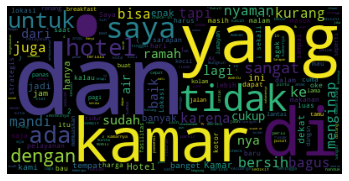

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# **PREPOCESSING**

**Data Cleaning**

In [74]:
data.head()

,text,label
0,hotel dengan desain modern simpel dan bersih p...,1
1,Staf sangat bagus hotel adalah kenyamanan sepe...,1
2,Harga tidak worth it dengan fasilitas kamar da...,1
3,Kamarnya kurang lebar tapi bersih kamar mandi ...,1
4,Secara Umum kondisinya bersih pelayanan juga O...,1


In [75]:
data["text"] = data['text'].str.replace('[^\w\s]','')  
data["text"] = data['text'].str.replace('\S*\d\S*','') # membersihkan angka 

In [76]:
data['text'][0]

'hotel dengan desain modern simpel dan bersih pelayanannya juga sangat ramah aku paling suka dengan jendelanya yang lebar dan balkon yang langsung menghadap pool dapat kejutan honeymoon set room juga dan bunga mawar cantik kekurangannya cuma satu makanannya lebih ke western tidak ada nasi kurang cocok untuk tamu lokal tapi kalau ke bali kami akan kembali ke the bene lagi '

**Case Folding**

In [77]:
data['text'] = data['text'].str.lower()

In [78]:
data['text'][0]

'hotel dengan desain modern simpel dan bersih pelayanannya juga sangat ramah aku paling suka dengan jendelanya yang lebar dan balkon yang langsung menghadap pool dapat kejutan honeymoon set room juga dan bunga mawar cantik kekurangannya cuma satu makanannya lebih ke western tidak ada nasi kurang cocok untuk tamu lokal tapi kalau ke bali kami akan kembali ke the bene lagi '

**Stopword Removal**

In [79]:
 import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
stop = stopwords.words('indonesian')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [81]:
data['text'][0]

'hotel desain modern simpel bersih pelayanannya ramah suka jendelanya lebar balkon langsung menghadap pool kejutan honeymoon set room bunga mawar cantik kekurangannya makanannya western nasi cocok tamu lokal bali the bene'

# **MEMBUAT DATA TRAIN & DATA TEST**

In [84]:
from numpy.random import RandomState
import pandas as pd
df = pd.read_csv('/content/datasethotel8.csv')
rng = RandomState()

#membuat data train 80% data test 20%
train = df.sample(frac=0.8, random_state=rng)
test = df.loc[~df.index.isin(train.index)]

train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

In [85]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

# **PROSES TOKENIZING DAN PAD SEQUENCE**

In [86]:
#importing libraries
import pandas as pd
import numpy as np
np.random.seed(10)

from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from keras.utils import plot_model

#reading csv files
train =pd.read_csv("train.csv", encoding= 'unicode_escape')
test =pd.read_csv("test.csv", encoding= 'unicode_escape')              
             

#train_test split
X_train, Y_train = train['text'], train['label']
X_test,Y_test = test['text'], test['label']

In [94]:
!pip install tokenizers
from tokenizers import Tokenizer

In [88]:
X = data['text'].tolist()

In [89]:
Y = data['label']

'**bold text**#Preprocessing pada kelas label Y = to_categorical(data['sentiment']) print("Shape pada sentiment:",Y.shape)

In [92]:
from sklearn.model_selection import train_test_split

In [97]:
#Tokenizing and change text to sequence
from sklearn.model_selection import train_test_split

max_features = 2000
MAX_SEQUENCE_LENGTH = 40

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X)

word_index = tokenizer.word_index
print("Found %s unique tokens" % len(word_index),'\n')
print("Index: "+str(tokenizer.word_index),"\n")



X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating="post")
X[:2]

Found 15468 unique tokens 

Index: {'kamar': 1, 'hotel': 2, 'bersih': 3, 'bagus': 4, 'nyaman': 5, 'mandi': 6, 'menginap': 7, 'nya': 8, 'ramah': 9, 'pelayanan': 10, 'air': 11, 'lokasi': 12, 'sarapan': 13, 'makanan': 14, 'enak': 15, 'banget': 16, 'jam': 17, 'strategis': 18, 'harga': 19, 'oke': 20, 'ac': 21, 'bau': 22, 'kamarnya': 23, 'breakfast': 24, 'malam': 25, 'kotor': 26, 'fasilitas': 27, 'kolam': 28, 'memuaskan': 29, 'masuk': 30, 'lantai': 31, 'luas': 32, 'hotelnya': 33, 'menu': 34, 'lumayan': 35, 'tidur': 36, 'dingin': 37, 'ok': 38, 'pagi': 39, 'tamu': 40, 'check': 41, 'jalan': 42, 'panas': 43, 'room': 44, 'parkir': 45, 'renang': 46, 'pas': 47, 'suara': 48, 'handuk': 49, 'makan': 50, 'in': 51, 'kali': 52, 'kebersihan': 53, 'kota': 54, 'overall': 55, 'sesuai': 56, 'keluarga': 57, 'pintu': 58, 'ruangan': 59, 'pelayanannya': 60, 'wifi': 61, 'staf': 62, 'checkin': 63, 'liburan': 64, 'aja': 65, 'kasih': 66, 'tinggal': 67, 'tv': 68, 'orang': 69, 'bed': 70, 'rusak': 71, 'sempit': 72, 'ana

array([[   2,  667,  531,    3,   60,    9,   94, 1053, 1284,  439,   92,
         532,  209, 1600,  842,  924,   44, 1686, 1219,  372,   80, 1220,
         171,   81,   40,  638,  177,  263, 1786,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [  62,    4,    2,  162,  734,    1,  376,   59,  178,  118,  755,
           2,    4,  119,   15, 1500,   82,  864,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0]], dtype=int32)

In [98]:
data['text'][0]
X[0]
#didapat dari kalimat dengan nomor kolom 2 yang isinnya "Sangat nyaman pelayanan juga baik dan ramah ha...	"

array([   2,  667,  531,    3,   60,    9,   94, 1053, 1284,  439,   92,
        532,  209, 1600,  842,  924,   44, 1686, 1219,  372,   80, 1220,
        171,   81,   40,  638,  177,  263, 1786,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [99]:
Y[0]
#melihat ulasan bersifat postivie (1) atau negative (0)

1

In [100]:
for i in range(len(Y)):
    if Y[i] > 0:
        Y[i] = 0
    elif Y[i] < 1:
        Y[i] = 1

# **Proses Klasifikasi dengan LSTM Non Embedding**

---



In [101]:
import nltk
from nltk.tokenize import word_tokenize
size_of_vocabulary=len(tokenizer.word_index) + 1 #+1 for padding
print(size_of_vocabulary)

15469


In [103]:
from keras.models import *
from keras.layers import *
from keras.callbacks import *

model=Sequential()

#embedding layer
model.add(Embedding(input_dim=size_of_vocabulary,output_dim=100,input_length=100,trainable=False)) 

#lstm layer
model.add(LSTM(128,return_sequences=True,dropout=0.2))

#Global Maxpooling
model.add(GlobalMaxPooling1D())

#Dense Layer
model.add(Dense(64,activation='relu')) 
model.add(Dense(1,activation='sigmoid')) 

#Add loss function, metrics, optimizer
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=["acc"]) 

#Adding callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)  
mc=ModelCheckpoint('best_nomodel.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)  

#Print summary of model
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1546900   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 128)          117248    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 1,672,469
Trainable params: 125,569
Non-trainable params: 1,546,900
_________________________________________________________________
None


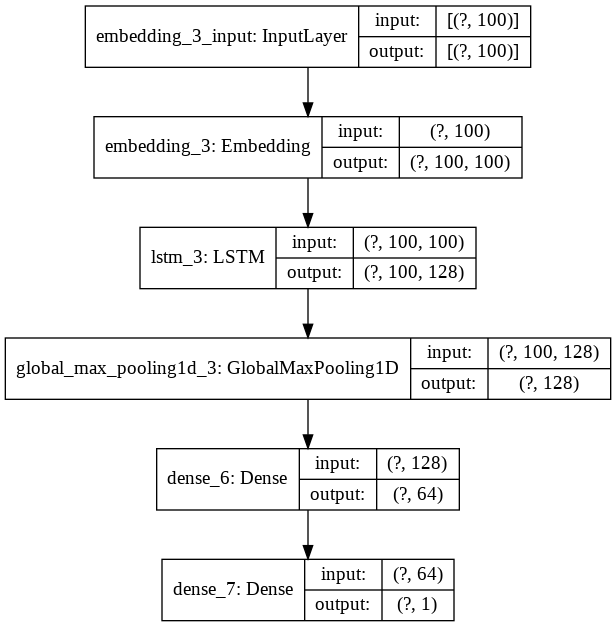

In [104]:
import matplotlib.pyplot as plt
from keras.utils import plot_model

plot_model(model, to_file='nomodel_plot.png', show_shapes=True, show_layer_names=True,rankdir='TB')

In [105]:
#Split dataset

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.05, random_state = 0, stratify = Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(9499, 40) (9499,)
(500, 40) (500,)


**visualisasi hasil compile**

In [106]:
#proses Training

batch_size = 32
history2 = model.fit(X_train, Y_train, epochs=50,validation_data=(X_test, Y_test),verbose=1,callbacks=[es,mc])

Epoch 1/50
297/297 [==============================] - ETA: 0s - loss: 0.5726 - acc: 0.7047WARNING:tensorflow:Model was constructed with shape (None, 100) for input Tensor("embedding_3_input:0", shape=(None, 100), dtype=float32), but it was called on an input with incompatible shape (None, 40).

Epoch 00001: val_acc improved from -inf to 0.77000, saving model to best_nomodel.h5
297/297 [==============================] - 13s 43ms/step - loss: 0.5726 - acc: 0.7047 - val_loss: 0.4965 - val_acc: 0.7700
Epoch 2/50
296/297 [============================>.] - ETA: 0s - loss: 0.5121 - acc: 0.7607
Epoch 00002: val_acc did not improve from 0.77000
297/297 [==============================] - 12s 41ms/step - loss: 0.5125 - acc: 0.7605 - val_loss: 0.5234 - val_acc: 0.7360
Epoch 3/50
297/297 [==============================] - ETA: 0s - loss: 0.4959 - acc: 0.7649
Epoch 00003: val_acc improved from 0.77000 to 0.78400, saving model to best_nomodel.h5
297/297 [==============================] - 12s 41ms/ste

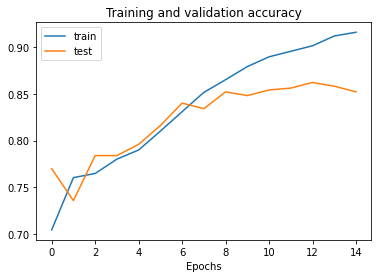

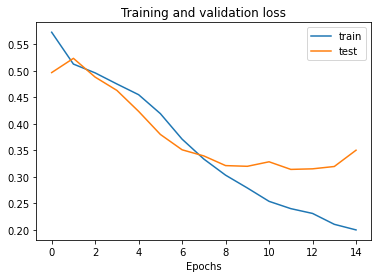

In [107]:
import matplotlib.pyplot as plt
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(history2.history['acc'], label='train')
plt.plot(history2.history['val_acc'], label='test')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.figure()
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [108]:
#Process Predict
Y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


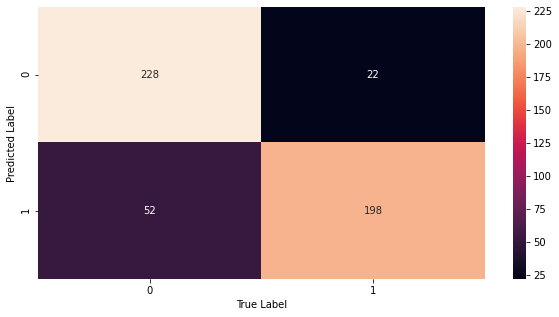

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(Y_test, Y_pred.round()), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

**Evaluasi Confusion Matrix**

In [110]:

#Evaluasi Performansi

target_names = ['class negatif', 'class positif']
print("confusion matrix",confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, target_names=target_names))

confusion matrix [[228  22]
 [ 52 198]]
               precision    recall  f1-score   support

class negatif       0.81      0.91      0.86       250
class positif       0.90      0.79      0.84       250

     accuracy                           0.85       500
    macro avg       0.86      0.85      0.85       500
 weighted avg       0.86      0.85      0.85       500



**Evaluasi Performasi**

df_test = pd.DataFrame({'true' : Y_test.tolist(), 'pred':Y_pred}) df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x)) target_names = ['class negatif', 'class positif'] print("confusion matrix",confusion_matrix(df_test.true, df_test.pred)) print(classification_report(df_test.true, df_test.pred, target_names=target_names))



In [111]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100

85.2

In [112]:
# Precision
from sklearn.metrics import precision_score
precision_score(Y_test, Y_pred, average=None)

array([0.81428571, 0.9       ])

In [113]:
# Recall
from sklearn.metrics import recall_score
recall_score(Y_test, Y_pred, average=None)

array([0.912, 0.792])

In [114]:
# F1 score
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average=None)

array([0.86037736, 0.84255319])

# ***Proses Word2Vec dan Klasifikasi LSTM Embedding***

**Input Word2Vec**

---



In [115]:
!pip install gensim

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
# Python program to generate word vectors using Word2Vec 



path = '/content/drive/My Drive/SKRIPSI/Sentimen Analisis/idwiki_word2vec_100.model'
s = sample.read()
id_w2v = gensim.models.word2vec.Word2Vec.load(path)
 

In [118]:
# Python program to generate word vectors using Word2Vec 

# importing all necessary modules 
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 

warnings.filterwarnings(action = 'ignore') 

import gensim 
from gensim.models import Word2Vec 

# mengambil data file
sample = open('/content/train.csv')
s = sample.read() 

# Replaces escape character with space 
f = s.replace("\n", " ") 

data = [] 

# iterate through each sentence in the file 
for i in sent_tokenize(f): 
	temp = [] 
	
	# tokenize the sentence into words 
	for j in word_tokenize(i): 
		temp.append(j.lower()) 

	data.append(temp) 

# Create CBOW model 
model1 = gensim.models.Word2Vec(data, min_count = 1, 
							size = 100, window = 5) 

 

In [120]:
# Print results 
print("Cosine similarity between 'mereka' " + 
               "and 'pergi' - CBOW : ", 
    model1.similarity('mereka', 'pergi')) 
      
print("Cosine similarity between 'jauh' " +
                 "and 'keluar' - CBOW : ", 
      model1.similarity('jauh', 'keluar')) 

Cosine similarity between 'mereka' and 'pergi' - CBOW :  0.9599613
Cosine similarity between 'jauh' and 'keluar' - CBOW :  0.5542242


In [122]:
id_w2v.wv['disini']
#menampilkan array dari kata "kamu"

array([-3.1811113 , -0.11730469,  0.04728158,  0.08710885,  0.39782473,
        0.7701766 ,  3.0931969 , -0.98798126, -1.1586543 ,  0.6115114 ,
       -1.8468951 , -2.079401  , -1.4777527 ,  0.52710676, -1.6387368 ,
       -0.6044829 , -1.2685272 , -1.297907  ,  1.791352  ,  0.29481548,
       -0.7441879 ,  0.18994464, -0.6421856 , -1.091221  ,  0.08754785,
       -0.18053268,  0.55799705,  0.0519934 ,  0.747899  , -0.57406056,
       -0.8776945 , -1.1062127 ,  0.01604934,  1.5612595 , -0.4322997 ,
        1.2827376 ,  0.01583049, -1.787296  , -0.62144727, -0.6327524 ,
       -0.5192011 ,  0.01266139, -0.39798844, -2.6799176 ,  0.31751823,
        0.15656696, -0.5391875 , -1.587814  , -0.54988307,  0.16400647,
       -0.866513  ,  1.9943407 , -0.5405949 ,  0.16551232,  1.5450898 ,
       -0.9653849 ,  1.3774611 , -0.8371203 ,  0.28675076,  0.53228533,
       -1.0654438 ,  0.13751706,  2.659209  , -2.8020127 , -2.251645  ,
       -0.4056373 , -0.19209881, -2.8255    , -0.9837852 , -1.19

In [123]:
print(id_w2v.most_similar('kamu'))

[('aku', 0.9069289565086365), ('engkau', 0.8783037066459656), ('kalian', 0.8701342344284058), ('dirimu', 0.8261834383010864), ('kami', 0.8139157295227051), ('diriku', 0.7930991649627686), ('kau', 0.7896549701690674), ('kita', 0.7878273129463196), ('hatimu', 0.7686338424682617), ('katakanlah', 0.7580780982971191)]


In [124]:
#Menjadikan weight dari model Word2Vec

w2v_weights = id_w2v.wv.vectors

In [125]:
#Untuk mengetahui jumlah vocab dan dimensi embedding

vocab_size, embedding_size = w2v_weights.shape
print("Size Vocab Kamus: {} - Dimensi Embedding: {}".format(vocab_size, embedding_size))

Size Vocab Kamus: 382351 - Dimensi Embedding: 100


In [126]:
from keras.models import *
from keras.layers import *
from keras.callbacks import *

model = Sequential()
model.add(Embedding(vocab_size,
                    embedding_size,
                    weights=[w2v_weights],
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=True))

model.add(LSTM(embedding_size, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer=Adam(lr=0.001),metrics = ['accuracy'])

#Add loss function, metrics, optimizer
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=["acc"]) 

#Adding callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)  
mc=ModelCheckpoint('best_nomodel.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1) 

#Print summary of model
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 40, 100)           38235100  
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 38,315,601
Trainable params: 38,315,601
Non-trainable params: 0
_________________________________________________________________
None


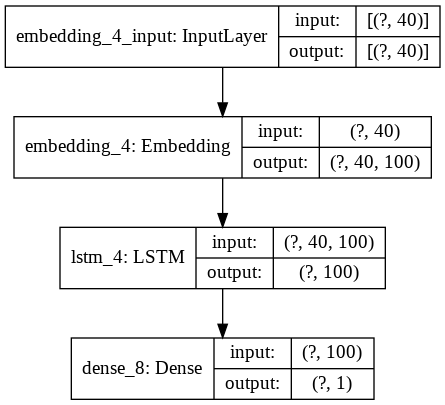

In [127]:
plot_model(model, to_file='nomodel_plot.png', show_shapes=True, show_layer_names=True,rankdir='TB')

In [128]:
#Split dataset

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.05, random_state = 0, stratify = Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(9499, 40) (9499,)
(500, 40) (500,)


**visualisasi hasil compile**

In [129]:
#proses Training

batch_size = 32
history2 = model.fit(X_train, Y_train, epochs=50,validation_data=(X_test, Y_test),verbose=1,callbacks=[es,mc])

Epoch 1/50
297/297 [==============================] - ETA: 0s - loss: 0.6967 - acc: 0.5166
Epoch 00001: val_acc improved from -inf to 0.53200, saving model to best_nomodel.h5
297/297 [==============================] - 77s 258ms/step - loss: 0.6967 - acc: 0.5166 - val_loss: 0.6606 - val_acc: 0.5320
Epoch 2/50
297/297 [==============================] - ETA: 0s - loss: 0.4862 - acc: 0.7817
Epoch 00002: val_acc improved from 0.53200 to 0.87200, saving model to best_nomodel.h5
297/297 [==============================] - 73s 246ms/step - loss: 0.4862 - acc: 0.7817 - val_loss: 0.3167 - val_acc: 0.8720
Epoch 3/50
297/297 [==============================] - ETA: 0s - loss: 0.3189 - acc: 0.8666
Epoch 00003: val_acc did not improve from 0.87200
297/297 [==============================] - 74s 249ms/step - loss: 0.3189 - acc: 0.8666 - val_loss: 0.2875 - val_acc: 0.8720
Epoch 4/50
297/297 [==============================] - ETA: 0s - loss: 0.2616 - acc: 0.8915
Epoch 00004: val_acc improved from 0.87200 

In [130]:
#Process Predict
Y_pred = model.predict_classes(X_test)

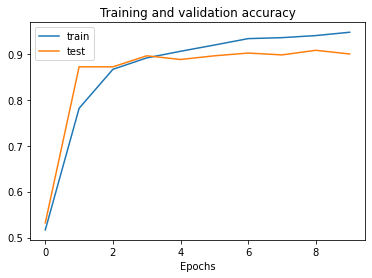

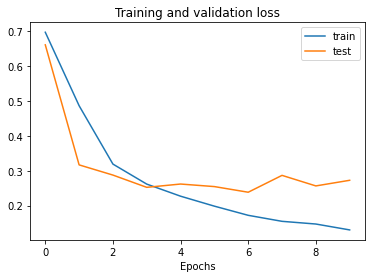

In [131]:
import matplotlib.pyplot as plt
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(history2.history['acc'], label='train')
plt.plot(history2.history['val_acc'], label='test')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.figure()
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

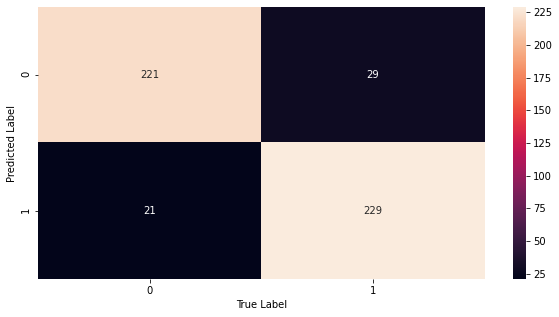

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(Y_test, Y_pred.round()), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

In [133]:

#Evaluasi Performansi

target_names = ['class negatif', 'class positif']
print("confusion matrix",confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, target_names=target_names))

confusion matrix [[221  29]
 [ 21 229]]
               precision    recall  f1-score   support

class negatif       0.91      0.88      0.90       250
class positif       0.89      0.92      0.90       250

     accuracy                           0.90       500
    macro avg       0.90      0.90      0.90       500
 weighted avg       0.90      0.90      0.90       500



**Evaluasi Performasi**

df_test = pd.DataFrame({'true' : Y_test.tolist(), 'pred':Y_pred}) df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x)) target_names = ['class negatif', 'class positif'] print("confusion matrix",confusion_matrix(df_test.true, df_test.pred)) print(classification_report(df_test.true, df_test.pred, target_names=target_names))



In [134]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100

90.0

In [135]:
# Precision
from sklearn.metrics import precision_score
precision_score(Y_test, Y_pred, average=None)

array([0.91322314, 0.8875969 ])

In [136]:
# Recall
from sklearn.metrics import recall_score
recall_score(Y_test, Y_pred, average=None)

array([0.884, 0.916])

In [137]:
# F1 score
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average=None)

array([0.89837398, 0.9015748 ])

In [140]:
#TSNE algorithm used to visualize word embeddings having huge amount (100) dimensions



def tsne():
    
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', random_state=23)
    new_values = tsne_model.fit_transform(tokens[:100])
    print(new_values.shape)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

    
    
    
    
tsne()
    

IndentationError: ignored